In [1]:
"""
    Importar las librerias correspondientes para su funcionamiento
"""
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtener el dataset

In [2]:
"""
    Declarar variables para implementar en el modelo incluyendo la ruta con datos aumentados
"""
image_size = 256
batch_size= 32
channels= 3
epochs = 5
url = "C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/DatosFinales/dataset_aumentado_bg"

In [3]:
"""
    Obtener los datos encontrados en el apartado con las clases encontradas
"""
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    url,
    shuffle = True,
    image_size=(image_size,image_size),
    batch_size = batch_size
    
)

Found 7272 files belonging to 4 classes.


# Enlistar las clases encontradas

In [4]:
"""
    Obtene los nombres de las clases encontradas en el dataset
"""
class_names = dataset.class_names
class_names

['Blackrot', 'Esca', 'Healthy', 'Leaf_blight']

In [5]:
#Logitud del dataset
len(dataset)

228

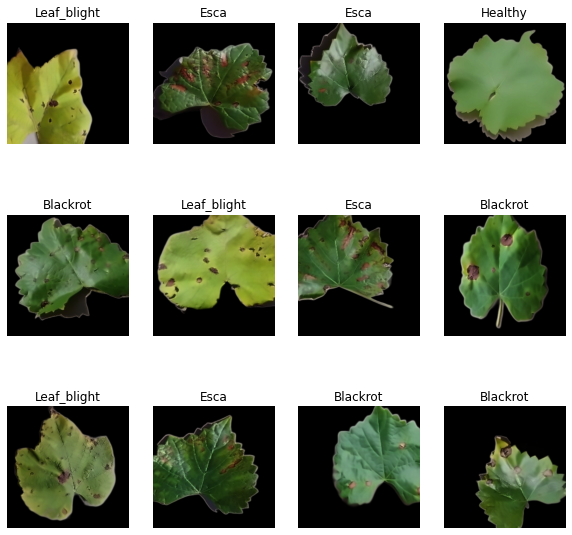

In [6]:
"""
    Recuperar la data, permitiendo tomar una muestra de información
"""
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Separación de los datos

### 80% ==> training
### 20% ==> 10% validation, 10% test

In [7]:
#Obtener los datos en el epoch
train_size = 0.8
len(dataset)*train_size


182.4

In [8]:
train_ds = dataset.take(189)
len(train_ds)

189

In [9]:
test_ds = dataset.skip(189)
len(test_ds)

39

In [10]:
val_size=0.1
len(dataset)*val_size

22.8

In [11]:
val_ds = test_ds.skip(24)
len(val_ds)

15

In [12]:
test_ds = test_ds.skip(24)
len(test_ds)

15

In [13]:
"""
    Definir la función mediante la cual se realizara la separación de la información correspondiente
"""
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle: 
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split* ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# Declaración del modelo

In [17]:
input_shape = (batch_size, image_size, image_size, channels)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(image_size,image_size)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

# Compilar el modelo

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
182/182 [==============================] - 169s 872ms/step - loss: 0.8891 - accuracy: 0.6000 - val_loss: 0.5854 - val_accuracy: 0.7670
Epoch 2/5
182/182 [==============================] - 154s 848ms/step - loss: 0.4740 - accuracy: 0.8174 - val_loss: 0.3908 - val_accuracy: 0.8452
Epoch 3/5
182/182 [==============================] - 142s 781ms/step - loss: 0.3271 - accuracy: 0.8766 - val_loss: 0.3058 - val_accuracy: 0.8878
Epoch 4/5
182/182 [==============================] - 144s 790ms/step - loss: 0.2159 - accuracy: 0.9188 - val_loss: 0.2163 - val_accuracy: 0.9233
Epoch 5/5
182/182 [==============================] - 164s 902ms/step - loss: 0.1889 - accuracy: 0.9303 - val_loss: 0.1322 - val_accuracy: 0.9560


In [21]:
_, acc = model.evaluate(test_ds)

22/22 [==============================] - 30s 243ms/step - loss: 0.1452 - accuracy: 0.9474


In [22]:
print('Accuracy:  %.2f' % (acc * 100.0))

Accuracy:  94.74


In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

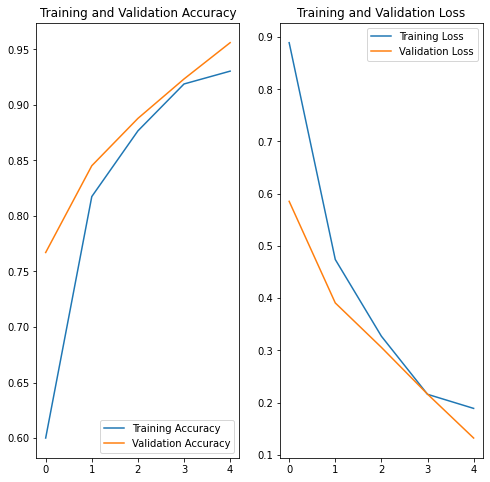

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Validación en las predicciones

first image to predict
actual label: Leaf_blight
predicted label: Blackrot


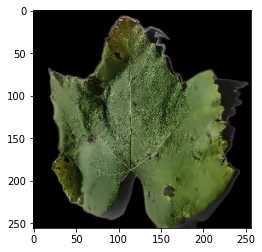

In [25]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[8].numpy().astype('uint8')
    first_label = labels_batch[8].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

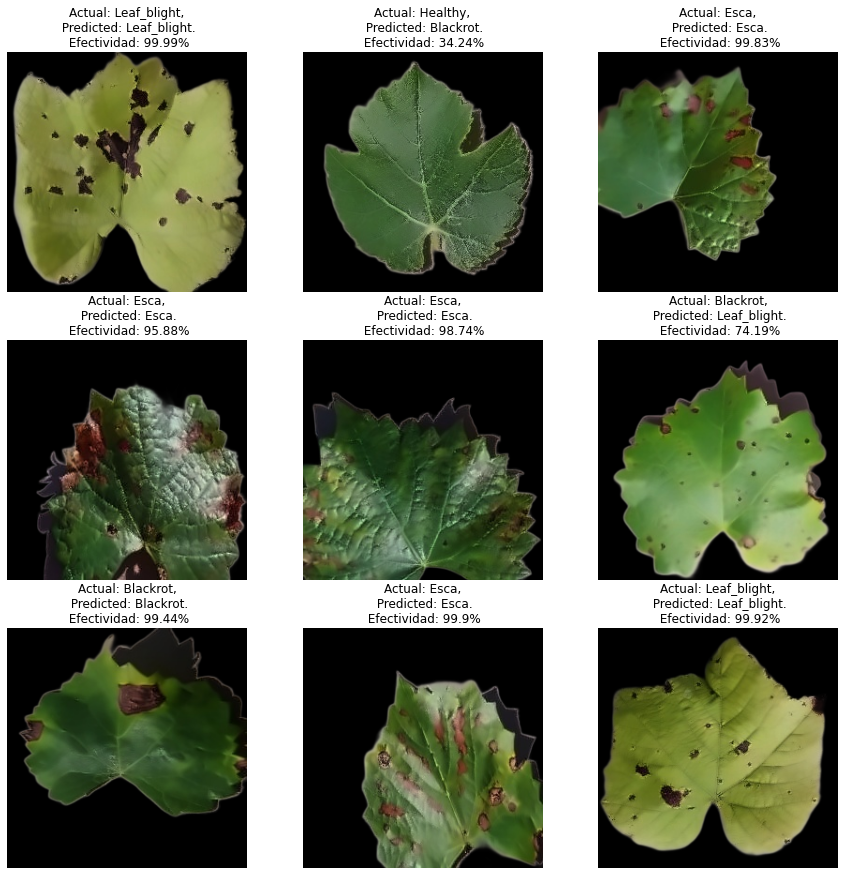

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Efectividad: {confidence}%")
        
        plt.axis("off")